In [1]:
# As usual, a bit of setup
from select_image import *

import sys
sys.path.append('C:/Users/Mark_Espinosa/Documents/A2/assignment2')
sys.path.append('C:/Users/Mark_Espinosa/Documents/A_CNN_Model')
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from cs231n.classifiers.cnn import *
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  #print(np.maximum(1e-8, np.abs(x) + np.abs(y)))
  #print(np.abs(x - y))
  #print(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))
  #print( np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y)))))
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [16]:
import os,random 
from select_image import Imagenet2017

Imagenet = Imagenet2017()

file_exists = os.path.isfile('covered_categories.txt')
if file_exists:
    os.remove('covered_categories.txt')

file = open('covered_categories.txt','w')
file.close()

cat_array = Imagenet.CategoryNumbers()

Generating File
File Generated


C:\Users\Marks-M3800\Documents\A_CNN_Model\select_image.py:273: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  temp_image = refreshed_image[ymin:ymax,xmin:xmax,:]


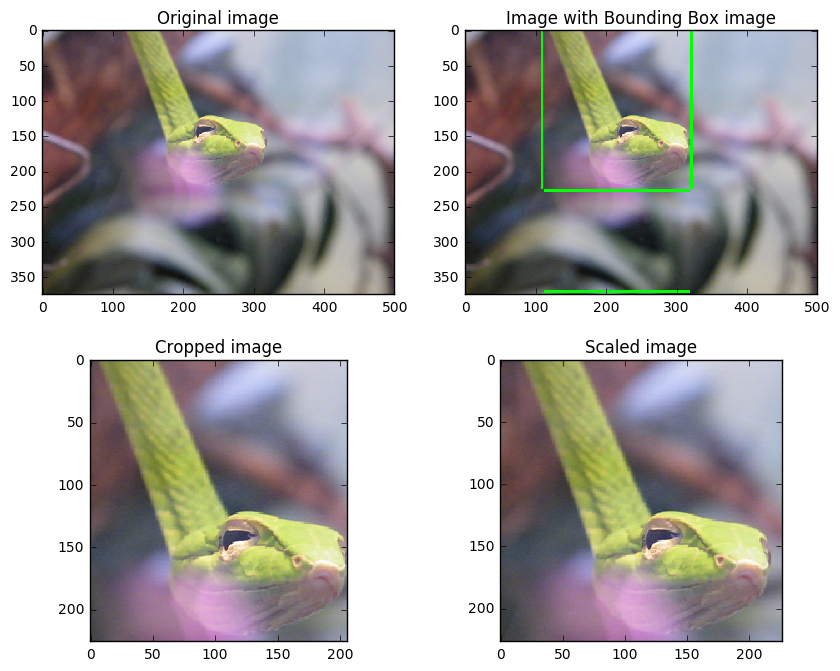

In [17]:

image,xmin,ymin,xmax,ymax,category,class_num = Imagenet.imageselect()
plt.subplot(2,2,1)
plt.imshow(image.astype('uint8'))
plt.title('Original image')

bbox_image = Imagenet.BoundingBox(image,xmin,ymin,xmax,ymax)
cropped_image,rows,columns = Imagenet.CroppedImage(image,xmin,ymin,xmax,ymax)
scaled_image = Imagenet.ScaleImage226(image,xmin,ymin,xmax,ymax,rows,columns)

# Show the original image

plt.subplot(2,2,2)
plt.imshow(bbox_image.astype('uint8'))
plt.title('Image with Bounding Box image')
plt.subplot(2,2,3)
plt.imshow(cropped_image.astype('uint8'))
plt.title('Cropped image')
plt.subplot(2,2,4)
plt.imshow(scaled_image.astype('uint8'))
plt.title('Scaled image')

In [26]:
from alexnet import AlexNet

image_size = 227

std = 1e-2
model = AlexNet(input_dim=(3,image_size,image_size), hidden_dim=4096, num_classes=1000, weight_scale=std)


print ('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
print(model.params['W1'].std())
#print('W1_std = ', W1_std)
#print('W1 = ', model.params['W1'])
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

X = np.ones((1,3,image_size,image_size))
print(X.shape)
print(scaled_image.shape)
X[0] = np.transpose(scaled_image, [2,0,1])


scores = model.loss(X)
print('scores shape = ', scores.shape)

filename, foldername = Imagenet.FileInfo()
print(filename)
print(foldername)

#y = np.asarray([foldername])
y = np.asarray([class_num])
loss, grads = model.loss(X, y)
print('loss = ', loss)


Testing initialization ... 
0.0100243360515
(1, 3, 227, 227)
(227, 227, 3)
AlexNet Forward Pass Done
scores shape =  (1, 1000)
n01739381_4919.JPEG
n01739381
AlexNet Forward Pass Done
loss =  6.86824412552
Backprop Affine3
Backprop Affine2
Backprop Affine1
Backprop MaxPool3
Backprop Relu5
Backprop Conv5
Backprop Relu4
Backprop Conv4
Backprop Relu3
Backprop Conv3
Backprop MaxPool2
Backprop Relu2
Backprop Conv2
Backprop MaxPool1
Backprop Relu1
Backprop Conv1
AlexNet Backward Pass Done
loss =  6.86824412552


In [35]:
from alexnet_tf import AlexNet_TF
import sys
sys.path.append('C:/Anaconda3/envs')
import tensorflow as tf


image_size = 227
num_classes = 1000

std = 1e-2
model = AlexNet_TF()

X = np.ones((1,3,image_size,image_size))
y = np.asarray([num_classes])
test = tf.placeholder(tf.float32)

print(X.shape)
print(scaled_image.shape)
X[0] = np.transpose(scaled_image, [2,0,1])


scores = model.loss(X)
print('scores shape = ', scores.shape)

filename, foldername = Imagenet.FileInfo()
print(filename)
print(foldername)

loss = model.loss(X, y,input_dim = (3,image_size,image_size), hidden_dim = 4096, num_classes = 1000)


with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    loss_val = sess.run([loss])
print('loss = ', loss)


AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [2]:
from TrainNet import TrainNet

Train_Net = TrainNet()

x_train, y_train, y_train_name = Train_Net.get_train_data(num_train=1000, ten_classes = 1, clean_files = 1)
x_val, y_val = Train_Net.get_val_data(num_val=20,ten_classes = 1)

x_train = np.transpose(x_train, [0,3,1,2])
print("x_train shape = ", x_train.shape)
print("y_train shape = ",y_train.shape)
print("y_train = ",y_train)
print("y_train name = ",y_train_name)

print("x_val shape = ", x_val.shape)
print("y_val shape = ",y_val.shape)
print("y_val = ",y_val)
x_val = np.transpose(x_val, [0,3,1,2])

Generating File
File Generated
Training Image:  0
Training Image:  1
Training Image:  2
Training Image:  3
Training Image:  4
Training Image:  5
Training Image:  6
Training Image:  7
Training Image:  8
Training Image:  9
Training Image:  10
Training Image:  11
Training Image:  12
Training Image:  13
Training Image:  14
Training Image:  15
Training Image:  16
Training Image:  17
Training Image:  18
Training Image:  19
Training Image:  20
Training Image:  21
Training Image:  22
Training Image:  23
Training Image:  24
Training Image:  25
Training Image:  26
Training Image:  27
Training Image:  28
Training Image:  29
Training Image:  30
Training Image:  31
Training Image:  32
Training Image:  33
Training Image:  34
Training Image:  35
Training Image:  36
Training Image:  37
Training Image:  38
Training Image:  39
Training Image:  40
Training Image:  41
Training Image:  42
Training Image:  43
Training Image:  44
Training Image:  45
Training Image:  46
Training Image:  47
Training Image:  48

Training Image:  394
Training Image:  395
Training Image:  396
Training Image:  397
Training Image:  398
Training Image:  399
Training Image:  400
Training Image:  401
Training Image:  402
Training Image:  403
Training Image:  404
Training Image:  405
Training Image:  406
Training Image:  407
Training Image:  408
Training Image:  409
Training Image:  410
Training Image:  411
Training Image:  412
Training Image:  413
Training Image:  414
Training Image:  415
Training Image:  416
Training Image:  417
Training Image:  418
Training Image:  419
Training Image:  420
Training Image:  421
Training Image:  422
Training Image:  423
Training Image:  424
Training Image:  425
Training Image:  426
Training Image:  427
Training Image:  428
Training Image:  429
Training Image:  430
Training Image:  431
Training Image:  432
Training Image:  433
Training Image:  434
Training Image:  435
Training Image:  436
Training Image:  437
Training Image:  438
Training Image:  439
Training Image:  440
Training Imag

Training Image:  786
Training Image:  787
Training Image:  788
Training Image:  789
Training Image:  790
Training Image:  791
Training Image:  792
Training Image:  793
Training Image:  794
Training Image:  795
Training Image:  796
Training Image:  797
Training Image:  798
Training Image:  799
Training Image:  800
Training Image:  801
Training Image:  802
Training Image:  803
Training Image:  804
Training Image:  805
Training Image:  806
Training Image:  807
Training Image:  808
Training Image:  809
Training Image:  810
Training Image:  811
Training Image:  812
Training Image:  813
Training Image:  814
Training Image:  815
Training Image:  816
Training Image:  817
Training Image:  818
Training Image:  819
Training Image:  820
Training Image:  821
Training Image:  822
Training Image:  823
Training Image:  824
Training Image:  825
Training Image:  826
Training Image:  827
Training Image:  828
Training Image:  829
Training Image:  830
Training Image:  831
Training Image:  832
Training Imag

In [ ]:
from alexnet import AlexNet

image_size = 227

#reg =  0.0
#lr =  1e-05

reg =  1.401140567021367e-05
lr =  2.3550183270186455e-05

#reg =  3.0504134793189974e-05
#lr =  1.5723501240923918e-05

model2 = AlexNet(input_dim=(3,227,227), hidden_dim = 4096, num_classes = 10, weight_scale = 1e-2, reg = reg)

model2.get_saved_parameters(hidden_dim = 4096, num_classes = 10)

small_data = {
  'X_train': x_train,
  'y_train': y_train,
  'X_val': x_val,
  'y_val': y_val,
}

solver2 = Solver(model2, small_data,
                num_epochs=40, train_batch_size=20,
                val_batch_size = 20,
                update_rule='adam',
                optim_config={
                  'learning_rate': lr
                },
                lr_decay=1.0,
                reg = reg,
                verbose=True, print_every=1)
solver2.train()



W1.bin FOUND!!
b1.bin FOUND!!
W2.bin FOUND!!
b2.bin FOUND!!
W3.bin FOUND!!
b3.bin FOUND!!
W4.bin FOUND!!
b4.bin FOUND!!
W5.bin FOUND!!
b5.bin FOUND!!
W6.bin FOUND!!
b6.bin FOUND!!
W7.bin FOUND!!
b7.bin FOUND!!
W8.bin FOUND!!
b8.bin FOUND!!
(Iteration 1 / 2000) loss: 1.213990
(Epoch 0 / 40) train acc: 0.418000; val_acc: 0.300000 ; lr: 0.000024; reg: 0.000014
(Iteration 2 / 2000) loss: 4.550544
(Iteration 3 / 2000) loss: 3.881269
(Iteration 4 / 2000) loss: 6.154189
(Iteration 5 / 2000) loss: 3.164156
(Iteration 6 / 2000) loss: 5.008598
(Iteration 7 / 2000) loss: 2.478441
(Iteration 8 / 2000) loss: 4.664421
(Iteration 9 / 2000) loss: 5.677615
(Iteration 10 / 2000) loss: 1.194757
(Iteration 11 / 2000) loss: 1.656515
(Iteration 12 / 2000) loss: 2.359976
(Iteration 13 / 2000) loss: 1.376074
(Iteration 14 / 2000) loss: 1.888394
(Iteration 15 / 2000) loss: 1.372529
(Iteration 16 / 2000) loss: 2.717843
(Iteration 17 / 2000) loss: 1.407468
(Iteration 18 / 2000) loss: 0.924948
(Iteration 19 / 200

(Iteration 203 / 2000) loss: 1.354431
(Iteration 204 / 2000) loss: 1.100327
(Iteration 205 / 2000) loss: 1.445081
(Iteration 206 / 2000) loss: 1.234061
(Iteration 207 / 2000) loss: 1.282115
(Iteration 208 / 2000) loss: 1.424898
(Iteration 209 / 2000) loss: 1.173337
(Iteration 210 / 2000) loss: 1.260247
(Iteration 211 / 2000) loss: 0.938387
(Iteration 212 / 2000) loss: 1.158270
(Iteration 213 / 2000) loss: 1.268191
(Iteration 214 / 2000) loss: 1.269382
(Iteration 215 / 2000) loss: 1.165914
(Iteration 216 / 2000) loss: 1.357792
(Iteration 217 / 2000) loss: 1.217029
(Iteration 218 / 2000) loss: 1.320995
(Iteration 219 / 2000) loss: 1.217945
(Iteration 220 / 2000) loss: 1.386112
(Iteration 221 / 2000) loss: 1.329165
(Iteration 222 / 2000) loss: 1.389299
(Iteration 223 / 2000) loss: 1.077705
(Iteration 224 / 2000) loss: 1.240240
(Iteration 225 / 2000) loss: 1.246441
(Iteration 226 / 2000) loss: 1.448290
(Iteration 227 / 2000) loss: 1.244703
(Iteration 228 / 2000) loss: 1.276191
(Iteration 2

(Iteration 410 / 2000) loss: 1.972043
(Iteration 411 / 2000) loss: 1.845187
(Iteration 412 / 2000) loss: 1.970006
(Iteration 413 / 2000) loss: 1.870903
(Iteration 414 / 2000) loss: 1.921807
(Iteration 415 / 2000) loss: 1.855586
(Iteration 416 / 2000) loss: 1.871584
(Iteration 417 / 2000) loss: 1.986349
(Iteration 418 / 2000) loss: 1.957830
(Iteration 419 / 2000) loss: 1.924134
(Iteration 420 / 2000) loss: 1.902539
(Iteration 421 / 2000) loss: 1.922917
(Iteration 422 / 2000) loss: 1.906427
(Iteration 423 / 2000) loss: 2.038702
(Iteration 424 / 2000) loss: 1.893048
(Iteration 425 / 2000) loss: 1.890158
(Iteration 426 / 2000) loss: 1.971854
(Iteration 427 / 2000) loss: 1.908660
(Iteration 428 / 2000) loss: 1.962322
(Iteration 429 / 2000) loss: 1.892545
(Iteration 430 / 2000) loss: 2.073713
(Iteration 431 / 2000) loss: 2.027611
(Iteration 432 / 2000) loss: 1.960701
(Iteration 433 / 2000) loss: 1.957595
(Iteration 434 / 2000) loss: 1.898968
(Iteration 435 / 2000) loss: 1.974070
(Iteration 4

(Iteration 617 / 2000) loss: 2.216651
(Iteration 618 / 2000) loss: 2.199260
(Iteration 619 / 2000) loss: 2.224279
(Iteration 620 / 2000) loss: 2.250455
(Iteration 621 / 2000) loss: 2.241092
(Iteration 622 / 2000) loss: 2.147077
(Iteration 623 / 2000) loss: 2.242684
(Iteration 624 / 2000) loss: 2.269785
(Iteration 625 / 2000) loss: 2.207213
(Iteration 626 / 2000) loss: 2.278026
(Iteration 627 / 2000) loss: 2.228308
(Iteration 628 / 2000) loss: 2.218898
(Iteration 629 / 2000) loss: 2.260511
(Iteration 630 / 2000) loss: 2.278010
(Iteration 631 / 2000) loss: 2.272321
(Iteration 632 / 2000) loss: 2.243705
(Iteration 633 / 2000) loss: 2.219701
(Iteration 634 / 2000) loss: 2.256056
(Iteration 635 / 2000) loss: 2.228174
(Iteration 636 / 2000) loss: 2.270803
(Iteration 637 / 2000) loss: 2.260420
(Iteration 638 / 2000) loss: 2.252256
(Iteration 639 / 2000) loss: 2.231138
(Iteration 640 / 2000) loss: 2.275895
(Iteration 641 / 2000) loss: 2.237389
(Iteration 642 / 2000) loss: 2.256873
(Iteration 6

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(solver2.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver2.train_acc_history, '-o')
plt.plot(solver2.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [20]:
#print('>>> CONV1')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/W1.bin','wb')
file.write(solver2.best_params['W1'])
file.close()
print('W1 file saved')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/b1.bin','wb')
file.write(solver2.best_params['b1'])
file.close()
print('b1 file saved')

#print('>>> CONV2')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/W2.bin','wb')
file.write(solver2.best_params['W2'])
file.close()
print('W2 file saved')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/b2.bin','wb')
file.write(solver2.best_params['b2'])
file.close()
print('b2 file saved')

#print('>>> CONV3')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/W3.bin','wb')
file.write(solver2.best_params['W3'])
file.close()
print('W3 file saved')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/b3.bin','wb')
file.write(solver2.best_params['b3'])
file.close()
print('b3 file saved')

#print('>>> CONV4')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/W4.bin','wb')
file.write(solver2.best_params['W4'])
file.close()
print('W4 file saved')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/b4.bin','wb')
file.write(solver2.best_params['b4'])
file.close()
print('b4 file saved')


#print('>>> CONV5')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/W5.bin','wb')
file.write(solver2.best_params['W5'])
file.close()
print('W5 file saved')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/b5.bin','wb')
file.write(solver2.best_params['b5'])
file.close()
print('b5 file saved')

#print('>>> Affine1')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/W6.bin','wb')
file.write(solver2.best_params['W6'])
file.close()
print('W6 file saved')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/b6.bin','wb')
file.write(solver2.best_params['b6'])
file.close()
print('b6 file saved')

#print('>>> Affine2')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/W7.bin','wb')
file.write(solver2.best_params['W7'])
file.close()
print('W7 file saved')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/b7.bin','wb')
file.write(solver2.best_params['b7'])
file.close()
print('b7 file saved')

#print('>>> Affine3')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/W8.bin','wb')
file.write(solver2.best_params['W8'])
file.close()
print('W8 file saved')
file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/b8.bin','wb')
file.write(solver2.best_params['b8'])
file.close()
print('b8 file saved')

W1 file saved
b1 file saved
W2 file saved
b2 file saved
W3 file saved
b3 file saved
W4 file saved
b4 file saved
W5 file saved
b5 file saved
W6 file saved
b6 file saved
W7 file saved
b7 file saved
W8 file saved
b8 file saved


In [19]:
print(solver2.best_params['b8'])

file =  open('C:/Users/Mark_Espinosa/Documents/A_CNN_Model/params_temp/b8.bin','wb')
file.write(solver2.best_params['b8'])

[ 0.00099387 -0.00018061  0.00016986  0.00154023 -0.00033582  0.00087984
  0.00022283 -0.00129608 -0.0017953  -0.00022792]


80